# Desription
Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. In this competition, participants are asked to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.

# Data
You are provided hourly rental data spanning two years. For this competition, the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

Data Fields
datetime - hourly date + timestamp  
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
holiday - whether the day is considered a holiday
workingday - whether the day is neither a weekend nor holiday
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
temp - temperature in Celsius
atemp - "feels like" temperature in Celsius
humidity - relative humidity
windspeed - wind speed
casual - number of non-registered user rentals initiated
registered - number of registered user rentals initiated
count - number of total rentals


Data Fields
1. datetime - hourly date + timestamp  
* season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
	* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
	* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
	* 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

diro = 'C:\\Users\\Lenovo\\PycharmProjects\\Kaggle\\Project6_BikeDemand\\data\\'
train = pd.read_csv(diro + 'train.csv', parse_dates=True)
test = pd.read_csv(diro + 'test.csv')
samsub = pd.read_csv(diro + 'sampleSubmission.csv')

print('Import completed')

Import completed


In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [13]:
train.datetime = pd.to_datetime(train.datetime)
test.datetime = pd.to_datetime(test.datetime)

In [14]:
train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [10]:
print('Number of rows \n\ttrain:{}\n\ttest:{}\nNumber of columns\n\ttrain:{}\n\ttest:{}'
      .format(train.shape[0], test.shape[0], train.shape[1], test.shape[1]))

Number of rows 
	train:10886
	test:6493
Number of columns
	train:12
	test:9


In [57]:
nans = pd.concat([train.isnull().sum(), test.isnull().sum()], axis=1)
nans.columns=['Train', 'Test']
print('Amount of Null values:\n')
print(nans.T)
print('\nColumns which are not in Test data: {}'.format(list(nans[nans['Test'] != 0].index)))

Amount of Null values:

       atemp  casual  count  datetime  holiday  humidity  registered  season  \
Train    0.0     0.0    0.0       0.0      0.0       0.0         0.0     0.0   
Test     0.0     NaN    NaN       0.0      0.0       0.0         NaN     0.0   

       temp  weather  windspeed  workingday  
Train   0.0      0.0        0.0         0.0  
Test    0.0      0.0        0.0         0.0  

Columns which are not in Test data: ['casual', 'count', 'registered']


In [64]:
# train.loc[:, common].describe().loc[['mean', 'min', 'max'], :]

,temp,atemp,windspeed,weather,humidity,season,holiday,workingday
mean,20.23086,23.655084,12.799395,1.418427,61.88646,2.506614,0.028569,0.680875
min,0.82000,0.760000,0.000000,1.000000,0.00000,1.000000,0.000000,0.000000
max,41.00000,45.455000,56.996900,4.000000,100.00000,4.000000,1.000000,1.000000


## Prepara Data

#### Use only columns which occur in test set. 

In [50]:
common = list(set(train.columns).intersection(set(test.columns)))
train = train.loc[: , common + ['count']]
test = test.loc[: , common]

In [51]:
# convert datetime to month and day; month; hour
for table in [train, test]:
    ## create new fields
    table['year'] = pd.DatetimeIndex(table.datetime).year
    table['month'] = pd.DatetimeIndex(table.datetime).month
    table['day'] = pd.DatetimeIndex(table.datetime).day
    table['hour'] = pd.DatetimeIndex(table.datetime).hour
    ## drop datetime
    table.drop('datetime', axis=1, inplace=True)

## Data Exploration

### Count per datetime

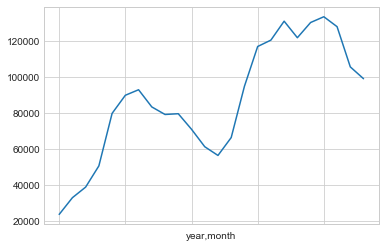

In [52]:
train.groupby(['year', 'month'])['count'].sum().plot()

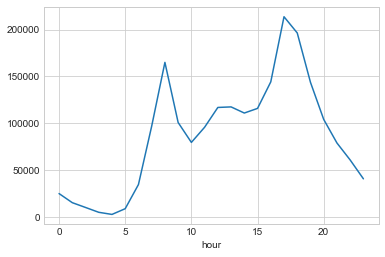

In [53]:
train.groupby(['hour'])['count'].sum().plot()